In [61]:
import pandas as pd

# Define the file paths
input_file_path = r"C:\Users\jackf\Desktop\Data\time_series_15min_singleindex_filtered.csv"
output_file_path = r"C:\Users\jackf\Desktop\Data\time_series_cleaned.csv"

# Load the CSV file
df = pd.read_csv(input_file_path)

# Parse 'cet_cest_timestamp' as datetime and set as index
df['cet_cest_timestamp'] = pd.to_datetime(df['cet_cest_timestamp'])
df.set_index('cet_cest_timestamp', inplace=True)

# Forward-fill missing values for critical columns
critical_columns = [
    "DE_load_actual_entsoe_transparency",
    "DE_load_forecast_entsoe_transparency",
    "DE_solar_generation_actual",
    "DE_wind_generation_actual",
    "DE_wind_offshore_generation_actual",
    "DE_wind_onshore_generation_actual"
]
df[critical_columns] = df[critical_columns].fillna(method="ffill")

# Interpolate missing values for profiles and capacities
profile_capacity_columns = [
    "DE_solar_profile", "DE_wind_profile", "DE_wind_offshore_profile", "DE_wind_onshore_profile",
    "DE_solar_capacity", "DE_wind_capacity", "DE_wind_offshore_capacity", "DE_wind_onshore_capacity"
]
df[profile_capacity_columns] = df[profile_capacity_columns].interpolate(method="linear")

# Save the cleaned dataset
df.to_csv(output_file_path)

print(f"Cleaned dataset saved to: {output_file_path}")


C:\Users\jackf\AppData\Local\Temp\ipykernel_20188\3981553217.py:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['cet_cest_timestamp'] = pd.to_datetime(df['cet_cest_timestamp'])
C:\Users\jackf\AppData\Local\Temp\ipykernel_20188\3981553217.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[critical_columns] = df[critical_columns].fillna(method="ffill")


Cleaned dataset saved to: C:\Users\jackf\Desktop\Data\time_series_cleaned.csv


Summary Statistics:
       DE_load_actual_entsoe_transparency  \
count                       201599.000000   
mean                         55492.538248   
std                          10041.150543   
min                          29158.120000   
25%                          47099.705000   
50%                          55117.290000   
75%                          64337.610000   
max                          77852.940000   

       DE_load_forecast_entsoe_transparency  DE_solar_capacity  \
count                         201599.000000      201603.000000   
mean                           54786.316040       43442.826902   
std                             9524.271305        4861.969615   
min                            28675.410000       37248.000000   
25%                            46951.685000       39018.000000   
50%                            54742.960000       41523.000000   
75%                            62897.605000       49222.000000   
max                            76392.520000   

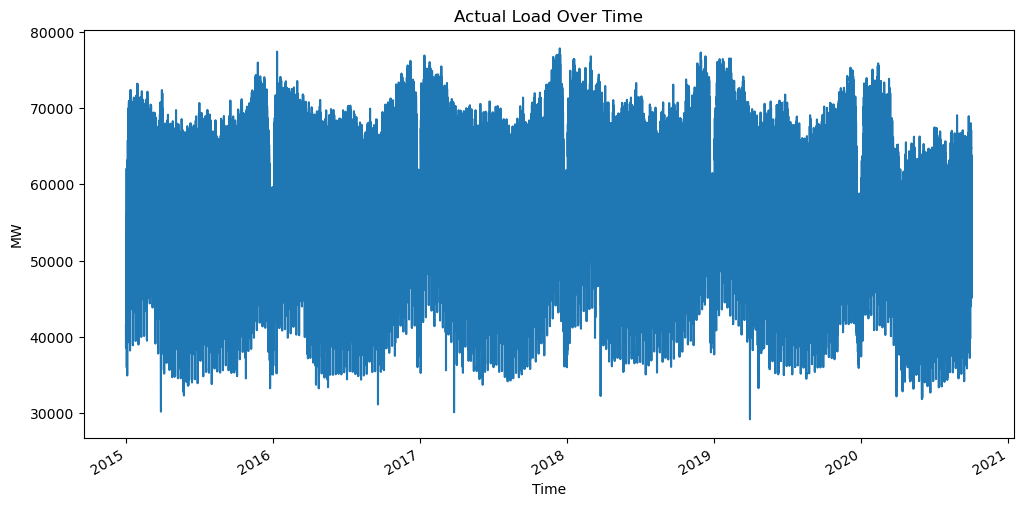

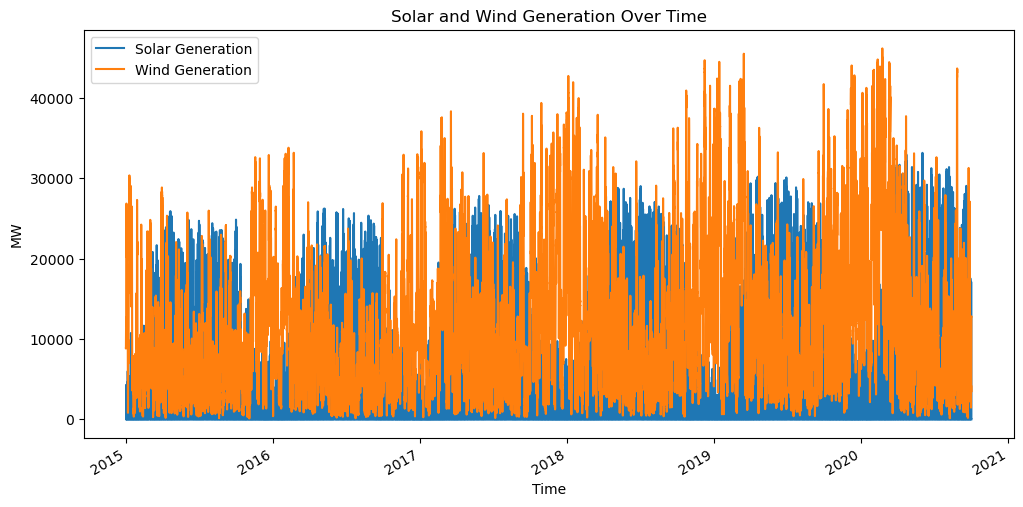

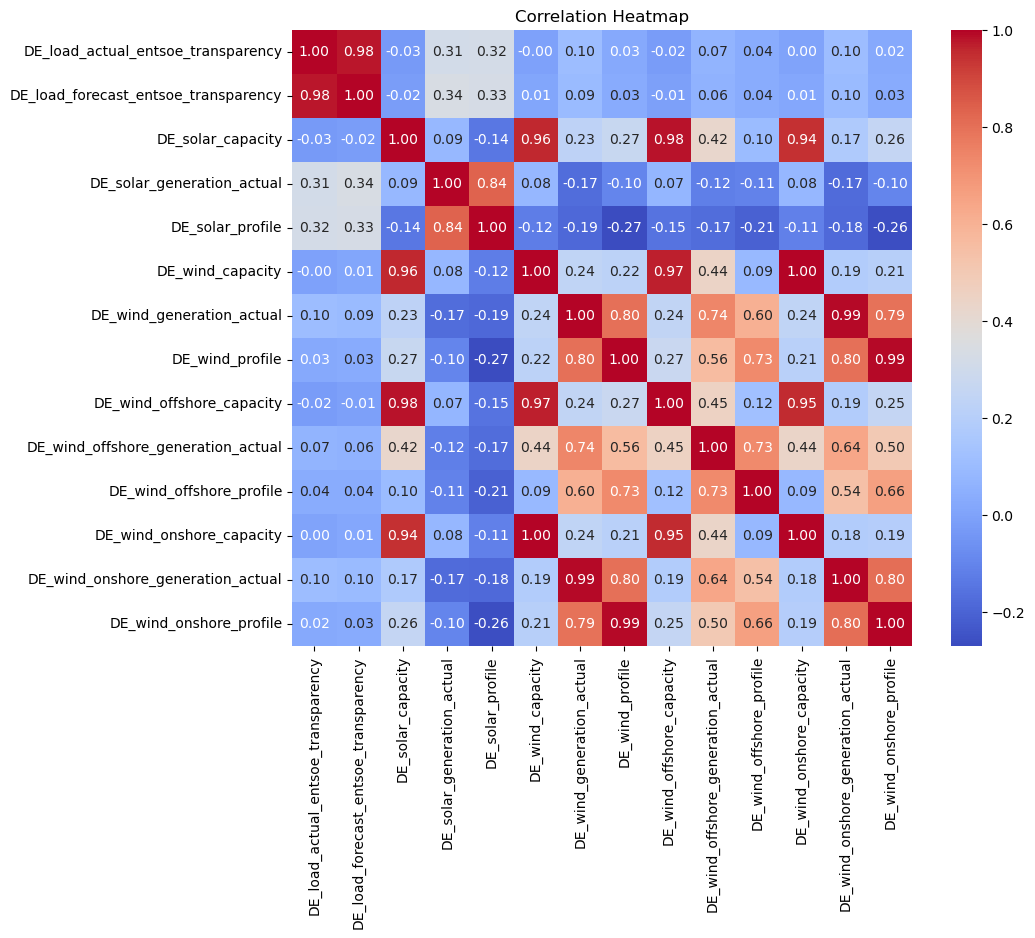

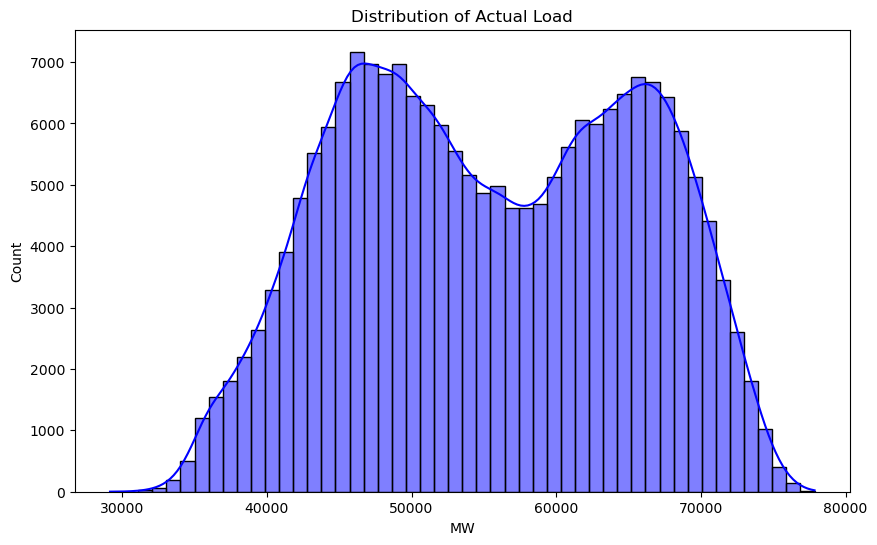

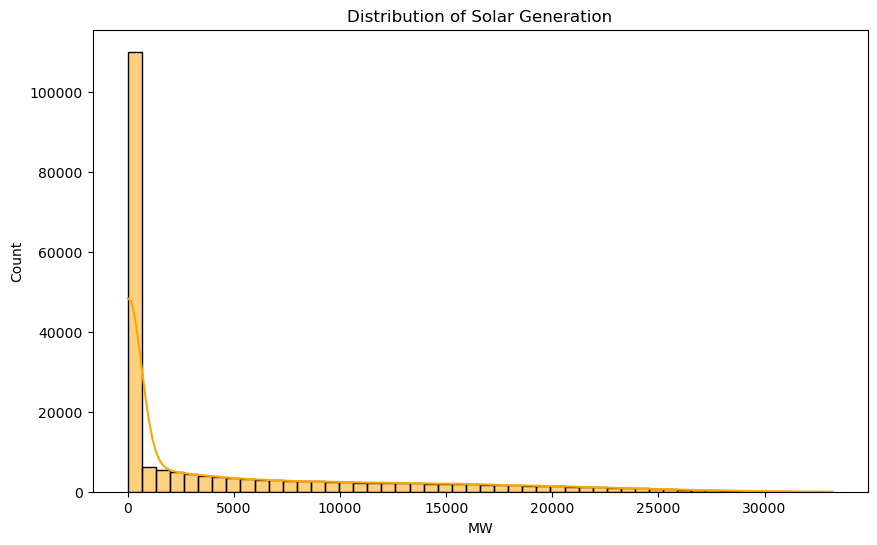

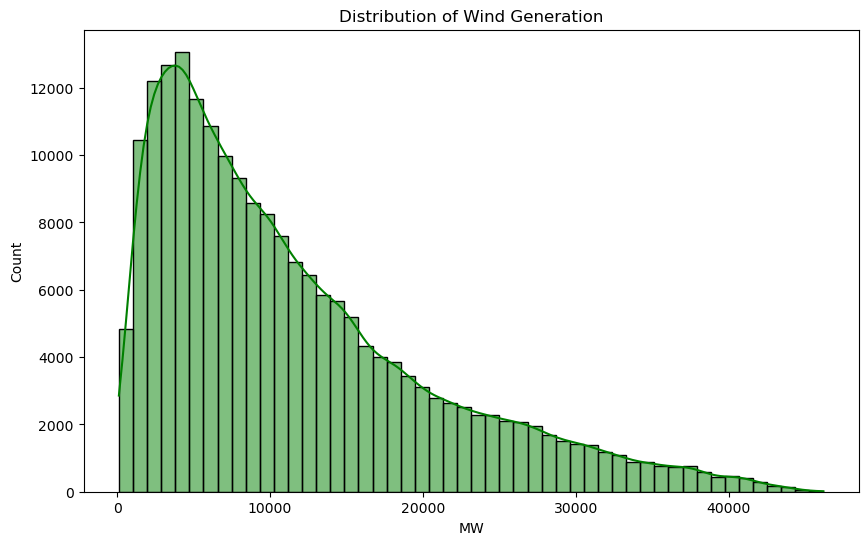

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = r"C:\Users\jackf\Desktop\Data\time_series_cleaned.csv"
df = pd.read_csv(file_path, parse_dates=["cet_cest_timestamp"], index_col="cet_cest_timestamp")

# Ensure only numeric columns are used for the correlation matrix
numeric_df = df.select_dtypes(include=["float64", "int64"])

# 1. Summary Statistics
print("Summary Statistics:")
print(numeric_df.describe())

# 2. Time-Series Visualization (previously worked)
plt.figure(figsize=(12, 6))
df["DE_load_actual_entsoe_transparency"].plot(title="Actual Load Over Time", xlabel="Time", ylabel="MW")
plt.show()

plt.figure(figsize=(12, 6))
df["DE_solar_generation_actual"].plot(label="Solar Generation")
df["DE_wind_generation_actual"].plot(label="Wind Generation")
plt.legend()
plt.title("Solar and Wind Generation Over Time")
plt.xlabel("Time")
plt.ylabel("MW")
plt.show()

# 3. Fixed Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4. Fixed Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(numeric_df["DE_load_actual_entsoe_transparency"], kde=True, bins=50, color="blue")
plt.title("Distribution of Actual Load")
plt.xlabel("MW")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(numeric_df["DE_solar_generation_actual"], kde=True, bins=50, color="orange")
plt.title("Distribution of Solar Generation")
plt.xlabel("MW")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(numeric_df["DE_wind_generation_actual"], kde=True, bins=50, color="green")
plt.title("Distribution of Wind Generation")
plt.xlabel("MW")
plt.show()


In [71]:
#Time-based features Electricity demand and generation follow daily, weekly, and seasonal cycles. We extract key time-based features

import pandas as pd

# Load the cleaned dataset
file_path = r"C:\Users\jackf\Desktop\Data\time_series_cleaned.csv"
df = pd.read_csv(file_path, parse_dates=["cet_cest_timestamp"])

# 🔹 Convert the timestamp to UTC and remove timezone information
df["cet_cest_timestamp"] = pd.to_datetime(df["cet_cest_timestamp"], utc=True)

# Set as index
df.set_index("cet_cest_timestamp", inplace=True)

# Now extract time-based features
df["hour"] = df.index.hour
df["day_of_week"] = df.index.dayofweek
df["month"] = df.index.month
df["is_weekend"] = (df["day_of_week"] >= 5).astype(int)

# Print confirmation
print(df.head())


                                  utc_timestamp  \
cet_cest_timestamp                                
2014-12-31 23:00:00+00:00  2014-12-31T23:00:00Z   
2014-12-31 23:15:00+00:00  2014-12-31T23:15:00Z   
2014-12-31 23:30:00+00:00  2014-12-31T23:30:00Z   
2014-12-31 23:45:00+00:00  2014-12-31T23:45:00Z   
2015-01-01 00:00:00+00:00  2015-01-01T00:00:00Z   

                           DE_load_actual_entsoe_transparency  \
cet_cest_timestamp                                              
2014-12-31 23:00:00+00:00                                 NaN   
2014-12-31 23:15:00+00:00                                 NaN   
2014-12-31 23:30:00+00:00                                 NaN   
2014-12-31 23:45:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                                 NaN   

                           DE_load_forecast_entsoe_transparency  \
cet_cest_timestamp                                                
2014-12-31 23:00:00+00:00                           

In [73]:
# (lag features) Create lag features for past 1, 6, 12, and 24 hours - To help the model learn patterns over time, we add previous values as features
lag_hours = [1, 6, 12, 24]
for lag in lag_hours:
    df[f"load_lag_{lag}h"] = df["DE_load_actual_entsoe_transparency"].shift(lag)
    df[f"solar_lag_{lag}h"] = df["DE_solar_generation_actual"].shift(lag)
    df[f"wind_lag_{lag}h"] = df["DE_wind_generation_actual"].shift(lag)


In [75]:
# (Rolling statistics) Rolling means over different windows (short-term and daily trends) - Instead of just using raw past values, rolling statistics give trend-based features
df["load_rolling_mean_6h"] = df["DE_load_actual_entsoe_transparency"].rolling(window=6).mean()
df["load_rolling_mean_24h"] = df["DE_load_actual_entsoe_transparency"].rolling(window=24).mean()

df["solar_rolling_mean_6h"] = df["DE_solar_generation_actual"].rolling(window=6).mean()
df["solar_rolling_mean_24h"] = df["DE_solar_generation_actual"].rolling(window=24).mean()

df["wind_rolling_mean_6h"] = df["DE_wind_generation_actual"].rolling(window=6).mean()
df["wind_rolling_mean_24h"] = df["DE_wind_generation_actual"].rolling(window=24).mean()


In [77]:
#Net Load Calculation (Demand - Renewables) Since renewables reduce the need for conventional generation, we compute net load.

df["net_load"] = df["DE_load_actual_entsoe_transparency"] - (
    df["DE_solar_generation_actual"] + df["DE_wind_generation_actual"]
)

In [83]:
#self explanatory.

df = df.dropna()

In [85]:
#save new dataset

output_file_path = r"C:\Users\jackf\Desktop\Data\time_series_featured.csv"
df.to_csv(output_file_path)

print(f"Feature-engineered dataset saved to: {output_file_path}")


Feature-engineered dataset saved to: C:\Users\jackf\Desktop\Data\time_series_featured.csv


In [3]:
import pandas as pd

# Load the feature-engineered dataset
file_path = r"C:\Users\jackf\Desktop\Data\time_series_featured.csv"
df = pd.read_csv(file_path, parse_dates=["cet_cest_timestamp"], index_col="cet_cest_timestamp")

# Verify structure
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201547 entries, 2015-01-01 13:15:00+00:00 to 2020-09-30 23:45:00+00:00
Data columns (total 38 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   utc_timestamp                         201547 non-null  object 
 1   DE_load_actual_entsoe_transparency    201547 non-null  float64
 2   DE_load_forecast_entsoe_transparency  201547 non-null  float64
 3   DE_solar_capacity                     201547 non-null  float64
 4   DE_solar_generation_actual            201547 non-null  float64
 5   DE_solar_profile                      201547 non-null  float64
 6   DE_wind_capacity                      201547 non-null  float64
 7   DE_wind_generation_actual             201547 non-null  float64
 8   DE_wind_profile                       201547 non-null  float64
 9   DE_wind_offshore_capacity             201547 non-null  float64
 10  DE_wind_offshore_gener

In [5]:
# Define target variable (what we want to predict)
target = "DE_load_actual_entsoe_transparency"

# Define feature columns (excluding the target)
features = [
    "hour", "day_of_week", "month", "is_weekend",  
    "load_lag_1h", "load_lag_6h", "load_lag_12h", "load_lag_24h",
    "solar_lag_1h", "solar_lag_6h", "solar_lag_12h", "solar_lag_24h",
    "wind_lag_1h", "wind_lag_6h", "wind_lag_12h", "wind_lag_24h",
    "load_rolling_mean_6h", "load_rolling_mean_24h",
    "solar_rolling_mean_6h", "solar_rolling_mean_24h",
    "wind_rolling_mean_6h", "wind_rolling_mean_24h"
]

# Drop any remaining NaN values (introduced by lag/rolling features)
df = df.dropna()

# Extract feature matrix (X) and target variable (y)
X = df[features]
y = df[target]

# Print shapes
print(f"Feature Matrix (X) Shape: {X.shape}")
print(f"Target Variable (y) Shape: {y.shape}")


Feature Matrix (X) Shape: (201547, 22)
Target Variable (y) Shape: (201547,)


In [7]:
from sklearn.model_selection import TimeSeriesSplit

# Define a time-based train-test split (e.g., 80% train, 20% test)
split_ratio = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_ratio], X.iloc[split_ratio:]
y_train, y_test = y.iloc[:split_ratio], y.iloc[split_ratio:]

print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")


Training Set: (161237, 22), (161237,)
Testing Set: (40310, 22), (40310,)


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"Model Performance:")
print(f"RMSE: {rmse:.2f} MW")
print(f"MAE: {mae:.2f} MW")


Model Performance:
RMSE: 353.31 MW
MAE: 260.60 MW


C:\Users\jackf\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


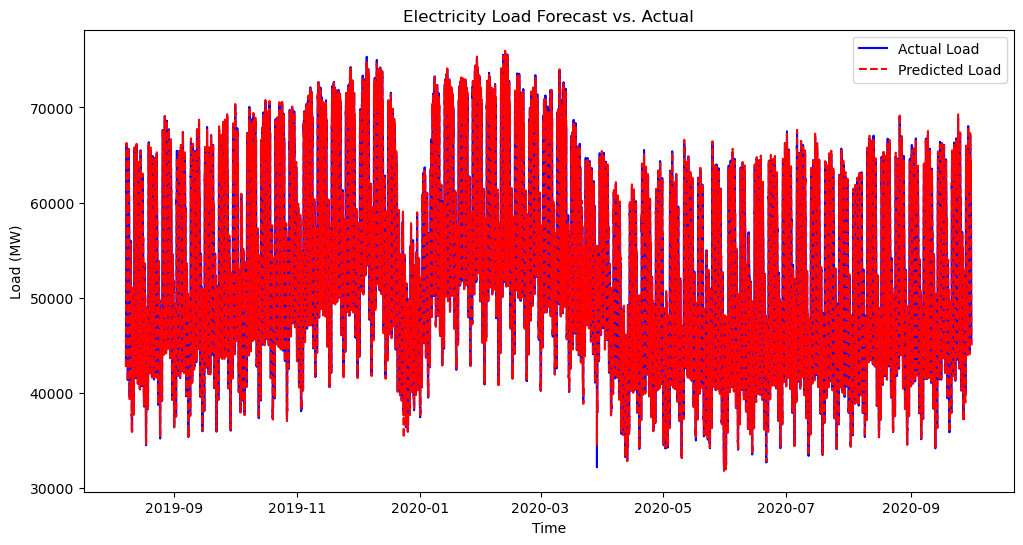

In [12]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted load
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Load", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted Load", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.title("Electricity Load Forecast vs. Actual")
plt.legend()
plt.show()


In [14]:
import joblib

# Save model to file
model_file_path = r"C:\Users\jackf\Desktop\Data\load_forecast_model.pkl"
joblib.dump(model, model_file_path)

print(f"Model saved at: {model_file_path}")


Model saved at: C:\Users\jackf\Desktop\Data\load_forecast_model.pkl


In [24]:
!pip install pulp


   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   -------------- ------------------------- 6.3/17.7 MB 32.1 MB/s eta 0:00:01
   ----------------------------- ---------- 13.1/17.7 MB 31.6 MB/s eta 0:00:01
   ---------------------------------------  17.6/17.7 MB 32.5 MB/s eta 0:00:01
   ---------------------------------------- 17.7/17.7 MB 21.4 MB/s eta 0:00:00


In [26]:
import pandas as pd
import pulp

# Load feature-engineered dataset
file_path = r"C:\Users\jackf\Desktop\Data\time_series_featured.csv"
df = pd.read_csv(file_path, parse_dates=["cet_cest_timestamp"], index_col="cet_cest_timestamp")

# Load trained forecasting model
import joblib
model_file_path = r"C:\Users\jackf\Desktop\Data\load_forecast_model.pkl"
model = joblib.load(model_file_path)

# Predict demand for next 24 hours
future_dates = pd.date_range(start=df.index[-1], periods=24, freq="H")  # Forecast next 24 hours
future_features_list = []

for future_timestamp in future_dates:
    # Create feature dictionary for each hour
    future_features = {
        "hour": future_timestamp.hour,
        "day_of_week": future_timestamp.dayofweek,
        "month": future_timestamp.month,
        "is_weekend": 1 if future_timestamp.dayofweek >= 5 else 0
    }
    
    # Fetch past data for lag features
    lags = [1, 6, 12, 24]
    for lag in lags:
        past_time = df.index[-1] - pd.Timedelta(hours=lag)
        if past_time in df.index:
            future_features[f"load_lag_{lag}h"] = df.loc[past_time, "DE_load_actual_entsoe_transparency"]
            future_features[f"solar_lag_{lag}h"] = df.loc[past_time, "DE_solar_generation_actual"]
            future_features[f"wind_lag_{lag}h"] = df.loc[past_time, "DE_wind_generation_actual"]
        else:
            # Use last known values if exact timestamps are missing
            future_features[f"load_lag_{lag}h"] = df["DE_load_actual_entsoe_transparency"].iloc[-1]
            future_features[f"solar_lag_{lag}h"] = df["DE_solar_generation_actual"].iloc[-1]
            future_features[f"wind_lag_{lag}h"] = df["DE_wind_generation_actual"].iloc[-1]

    # Rolling averages
    future_features["load_rolling_mean_6h"] = df["DE_load_actual_entsoe_transparency"].rolling(6).mean().iloc[-1]
    future_features["load_rolling_mean_24h"] = df["DE_load_actual_entsoe_transparency"].rolling(24).mean().iloc[-1]

    future_features["solar_rolling_mean_6h"] = df["DE_solar_generation_actual"].rolling(6).mean().iloc[-1]
    future_features["solar_rolling_mean_24h"] = df["DE_solar_generation_actual"].rolling(24).mean().iloc[-1]

    future_features["wind_rolling_mean_6h"] = df["DE_wind_generation_actual"].rolling(6).mean().iloc[-1]
    future_features["wind_rolling_mean_24h"] = df["DE_wind_generation_actual"].rolling(24).mean().iloc[-1]

    future_features_list.append(future_features)

# Convert to DataFrame
future_df = pd.DataFrame(future_features_list)

# Ensure correct feature order
feature_order = [
    "hour", "day_of_week", "month", "is_weekend",
    "load_lag_1h", "load_lag_6h", "load_lag_12h", "load_lag_24h",
    "solar_lag_1h", "solar_lag_6h", "solar_lag_12h", "solar_lag_24h",
    "wind_lag_1h", "wind_lag_6h", "wind_lag_12h", "wind_lag_24h",
    "load_rolling_mean_6h", "load_rolling_mean_24h",
    "solar_rolling_mean_6h", "solar_rolling_mean_24h",
    "wind_rolling_mean_6h", "wind_rolling_mean_24h"
]

future_df = future_df[feature_order]

# Make predictions for the next 24 hours
predicted_load = model.predict(future_df)

# Store predicted demand
future_df["forecasted_demand"] = predicted_load
future_df["timestamp"] = future_dates

# Print the forecasted values
print(future_df[["timestamp", "forecasted_demand"]])


C:\Users\jackf\AppData\Local\Temp\ipykernel_7432\1565261386.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=24, freq="H")  # Forecast next 24 hours


                   timestamp  forecasted_demand
0  2020-09-30 23:45:00+00:00         45967.8067
1  2020-10-01 00:45:00+00:00         45816.3910
2  2020-10-01 01:45:00+00:00         45824.6181
3  2020-10-01 02:45:00+00:00         45824.6181
4  2020-10-01 03:45:00+00:00         45824.6181
5  2020-10-01 04:45:00+00:00         45824.6181
6  2020-10-01 05:45:00+00:00         45824.6181
7  2020-10-01 06:45:00+00:00         45824.6181
8  2020-10-01 07:45:00+00:00         45824.6181
9  2020-10-01 08:45:00+00:00         45824.6181
10 2020-10-01 09:45:00+00:00         45824.6181
11 2020-10-01 10:45:00+00:00         45824.6181
12 2020-10-01 11:45:00+00:00         45824.6181
13 2020-10-01 12:45:00+00:00         45824.6181
14 2020-10-01 13:45:00+00:00         45829.4046
15 2020-10-01 14:45:00+00:00         45829.4046
16 2020-10-01 15:45:00+00:00         45829.4046
17 2020-10-01 16:45:00+00:00         45829.4046
18 2020-10-01 17:45:00+00:00         45838.4787
19 2020-10-01 18:45:00+00:00         458

In [28]:
# Define costs and capacities
conventional_cost = 40  # €/MWh
battery_cost = 10       # €/MWh (if available)
renewable_cost = 0      # €/MWh (solar and wind are free)

# Define max capacities
conventional_max = 5000  # MW
battery_max = 1000       # MW (if available)
renewable_max = 5000     # MW

# Initialize optimization problem
prob = pulp.LpProblem("GridOptimization", pulp.LpMinimize)

# Create decision variables
x_conventional = pulp.LpVariable.dicts("Conventional", future_dates, lowBound=0, upBound=conventional_max)
x_battery = pulp.LpVariable.dicts("Battery", future_dates, lowBound=0, upBound=battery_max)
x_renewable = pulp.LpVariable.dicts("Renewables", future_dates, lowBound=0, upBound=renewable_max)

# Objective: Minimize total cost
prob += pulp.lpSum([conventional_cost * x_conventional[t] + battery_cost * x_battery[t] for t in future_dates])

# Constraints: Ensure demand is met at every timestep
for i, t in enumerate(future_dates):
    prob += x_conventional[t] + x_battery[t] + x_renewable[t] >= future_df.loc[i, "forecasted_demand"], f"Demand_{t}"

# Solve the optimization problem
prob.solve(pulp.PULP_CBC_CMD(msg=0))

# Print the optimized allocation
for t in future_dates:
    print(f"Time {t}: Conventional = {pulp.value(x_conventional[t]):.2f} MW | "
          f"Battery = {pulp.value(x_battery[t]):.2f} MW | "
          f"Renewables = {pulp.value(x_renewable[t]):.2f} MW | "
          f"Demand = {future_df.loc[future_df['timestamp'] == t, 'forecasted_demand'].values[0]:.2f} MW")

print(f"Optimization Complete. Total Cost: {pulp.value(prob.objective):.2f} €")


Time 2020-09-30 23:45:00+00:00: Conventional = 39967.81 MW | Battery = 1000.00 MW | Renewables = 5000.00 MW | Demand = 45967.81 MW
Time 2020-10-01 00:45:00+00:00: Conventional = 39816.39 MW | Battery = 1000.00 MW | Renewables = 5000.00 MW | Demand = 45816.39 MW
Time 2020-10-01 01:45:00+00:00: Conventional = 39824.62 MW | Battery = 1000.00 MW | Renewables = 5000.00 MW | Demand = 45824.62 MW
Time 2020-10-01 02:45:00+00:00: Conventional = 39824.62 MW | Battery = 1000.00 MW | Renewables = 5000.00 MW | Demand = 45824.62 MW
Time 2020-10-01 03:45:00+00:00: Conventional = 39824.62 MW | Battery = 1000.00 MW | Renewables = 5000.00 MW | Demand = 45824.62 MW
Time 2020-10-01 04:45:00+00:00: Conventional = 39824.62 MW | Battery = 1000.00 MW | Renewables = 5000.00 MW | Demand = 45824.62 MW
Time 2020-10-01 05:45:00+00:00: Conventional = 39824.62 MW | Battery = 1000.00 MW | Renewables = 5000.00 MW | Demand = 45824.62 MW
Time 2020-10-01 06:45:00+00:00: Conventional = 39824.62 MW | Battery = 1000.00 MW |

In [30]:
import pandas as pd

# Save forecasted demand for Tableau
forecast_output_path = r"C:\Users\jackf\Desktop\Data\forecasted_demand_tableau.csv"
future_df[["timestamp", "forecasted_demand"]].to_csv(forecast_output_path, index=False)

print(f"Forecasted demand saved to: {forecast_output_path}")


✅ Forecasted demand saved to: C:\Users\jackf\Desktop\Data\forecasted_demand_tableau.csv


In [32]:
# Save optimization results for Tableau
optimization_results = []

for t in future_dates:
    optimization_results.append({
        "timestamp": t,
        "conventional_power": pulp.value(x_conventional[t]),
        "battery_power": pulp.value(x_battery[t]),
        "renewable_power": pulp.value(x_renewable[t]),
        "forecasted_demand": future_df.loc[future_df["timestamp"] == t, "forecasted_demand"].values[0]
    })

# Convert to DataFrame
optimization_df = pd.DataFrame(optimization_results)

# Save as CSV
optimization_output_path = r"C:\Users\jackf\Desktop\Data\optimization_results_tableau.csv"
optimization_df.to_csv(optimization_output_path, index=False)

print(f"✅ Optimization results saved to: {optimization_output_path}")


✅ Optimization results saved to: C:\Users\jackf\Desktop\Data\optimization_results_tableau.csv
